In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
import scipy.integrate as integrate

In [2]:
%matplotlib inline

In [3]:
def hamiltonian(Ec, Ej, N, ng):
    """
    Return the charge qubit hamiltonian as a Qobj instance.
    """
    m = np.diag(4 * Ec * (np.arange(-N,N+1)-ng)**2) + 0.5 * Ej * (np.diag(-np.ones(2*N), 1) + 
                                                               np.diag(-np.ones(2*N), -1))
    return Qobj(m)

In [4]:
hamiltonian(1.0,10.0,10,0.5)

Quantum object: dims = [[21], [21]], shape = (21, 21), type = oper, isherm = True
Qobj data =
[[441.  -5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [ -5. 361.  -5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.  -5. 289.  -5.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.  -5. 225.  -5.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.  -5. 169.  -5.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.  -5. 121.  -5.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.  -5.  81.  -5.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.  -5.  49.  -5.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.

In [5]:
def plot_energies(ng_vec, energies, ymax=(20, 3)):
    """
    Plot energy levels as a function of bias parameter ng_vec.
    """
    fig, axes = plt.subplots(1,2, figsize=(16,6))

    for n in range(len(energies[0,:])):
        axes[0].plot(ng_vec, energies[:,n])
    axes[0].set_ylim(-2, ymax[0])
    axes[0].set_xlabel(r'$n_g$', fontsize=18)
    axes[0].set_ylabel(r'$E_n$', fontsize=18)

    for n in range(len(energies[0,:])):
        axes[1].plot(ng_vec, (energies[:,n]-energies[:,0]))
    axes[1].set_ylim(-0.1, ymax[1])
    axes[1].set_xlabel(r'$n_g$', fontsize=18)
    axes[1].set_ylabel(r'$(E_n-E_0)/(E_1-E_0)$', fontsize=18)
    return fig, axes

In [6]:
axes[1].plot(ng_vec, (energies[:,n]-energies[:,0])/(energies[:,1]-energies[:,0]))

NameError: name 'axes' is not defined

In [6]:
def visualize_dynamics(result, ylabel):
    """
    Plot the evolution of the expectation values stored in result.
    """
    fig, ax = plt.subplots(figsize=(12,5))

    ax.plot(result.times, result.expect[0])

    ax.set_ylabel(ylabel, fontsize=16)
    ax.set_xlabel(r'$t$', fontsize=16);

In [7]:
N = 10
Ec = 1.0
Ej = 50.0
ng=0.5

In [8]:
np.sqrt(8*Ec*Ej)

20.0

In [9]:
ng_vec = np.linspace(-1, 1, 200)

energies = np.array([hamiltonian(Ec, Ej, N, ng).eigenenergies() for ng in ng_vec])

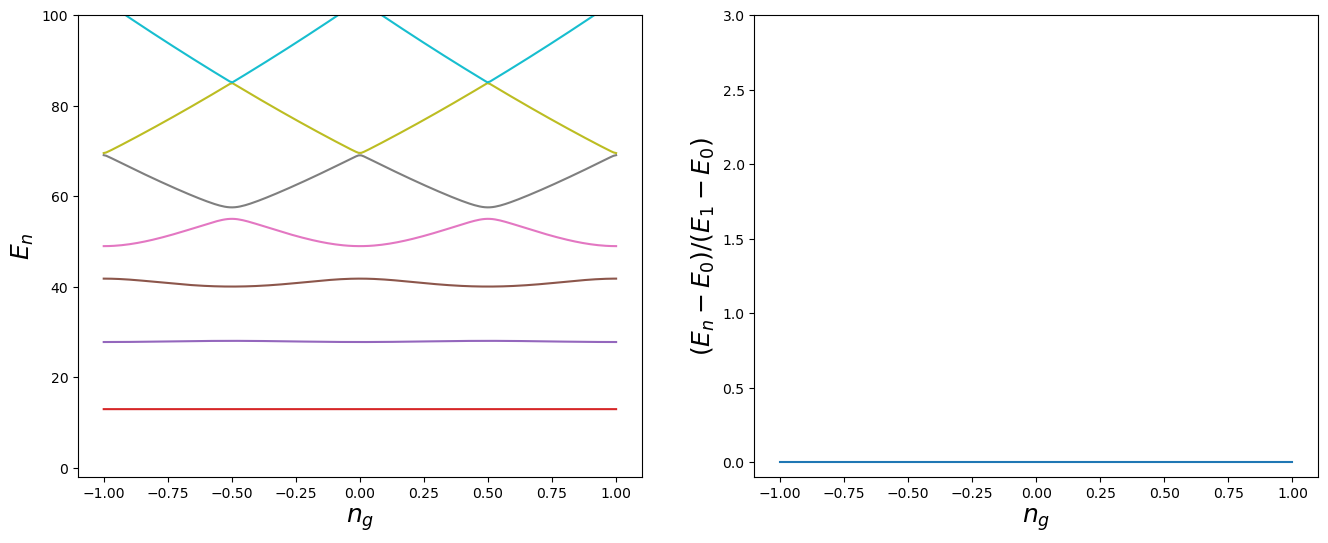

In [10]:
plot_energies(ng_vec, energies,ymax=(100, 3));

In [11]:
evals, ekets = hamiltonian(Ec, Ej, N, ng).eigenstates()

In [12]:
#We split the Hamiltonian to charging term and josephson term:
def Hc(Ec, Ej, N, ng):
    
    m = np.diag(4 * Ec * (np.arange(-N,N+1)-ng)**2) 
    
    return Qobj(m)

def Hj(Ec, Ej, N, ng):
    
    m = 0.5 * Ej * (np.diag(-np.ones(2*N), 1) + np.diag(-np.ones(2*N), -1))
    
    return Qobj(m)

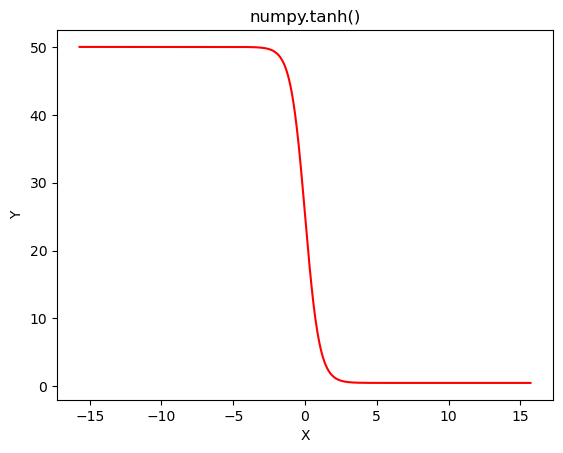

In [13]:
in_array = np.linspace(-5*np.pi, 5*np.pi, 1020)
p0=0.99
out_array = Ej*(1-(1+np.tanh(in_array))/2*p0)
plt.plot(in_array, out_array, color = 'red')
plt.title("numpy.tanh()")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [14]:
# Time depenedent part (drive)
def Hd_coeff(t,args):
    Percentage=args['Percentage']
    Range=args['Range']
    T=args['T']
    return 1-Percentage*(1+np.tanh(-Range+(t/T)*2*Range))/2.0

In [15]:
Htot = [Hc(Ec,Ej,N,ng), [Hj(Ec,Ej,N,ng), Hd_coeff]]

In [16]:
T=30.0
Points=3000

In [17]:
psi0=ekets[0]
P0=0.99
R0=500*np.pi
evalsf, eketsf = hamiltonian(Ec, Ej*(1-P0*(1+np.tanh(-R0+(T/T)*2*R0))/2.0), N, ng).eigenstates()


In [18]:
tlist = np.linspace(0, T, Points)
output = sesolve(Htot, psi0, tlist, args={'Percentage': P0, 'Range': R0,'T':T})

In [19]:
Ovrlp0=np.zeros(Points)
for n in range(0,Points):
   Ovrlp0[n]=np.abs(psi0.dag().overlap(output.states[n]))**2

In [20]:
Ovrlp2=np.zeros(Points)
for n in range(0,Points):
   Ovrlp2[n]=np.abs(eketsf[0].dag().overlap(output.states[n]))**2

In [21]:
Ovrlp3=np.zeros(Points)
for n in range(0,Points):
   Ovrlp3[n]=np.abs(eketsf[2].dag().overlap(output.states[n]))**2

(0.0, 1.1)

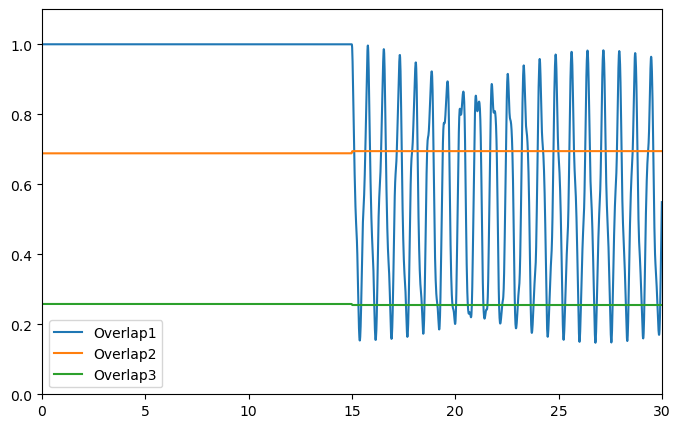

In [24]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(tlist, Ovrlp0, label="Overlap1")
ax.plot(tlist, Ovrlp2, label="Overlap2")
ax.plot(tlist, Ovrlp3, label="Overlap3")
ax.legend()
ax.set_xlim([0,T])
ax.set_ylim([0.0, 1.1])